[View in Colaboratory](https://colab.research.google.com/github/findingfoot/ML_practice-codes/blob/master/Lasso_and_Ridge_regression.ipynb)

In [0]:
import warnings
warnings.filterwarnings('ignore')
import sys
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import datasets
from tensorflow.python.framework import ops



In [0]:
regression_type = 'lasso'

In [0]:
ops.reset_default_graph()

sess = tf.Session()

In [0]:
iris = datasets.load_iris()

x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

In [0]:
#declare the batch size
batch_size = 25

#define the placeholders
x_data = tf.placeholder(shape = [None,1], dtype=tf.float32)

y_target = tf.placeholder(shape = [None,1], dtype=tf.float32)

In [0]:
#set the seed

seed = 23
np.random.seed(seed)
tf.set_random_seed(seed)

In [0]:
#set the variables for the regression

A = tf.Variable(tf.random_normal(shape = [1,1]))
b = tf.Variable(tf.random_normal(shape = [1,1]))

In [0]:
#model output 

model_output = tf.add(tf.matmul(x_data, A), b)

In [0]:
#Loss function
if regression_type == 'lasso':
   # Declare Lasso loss function
    # Lasso Loss = L2_Loss + heavyside_step,
    # Where heavyside_step ~ 0 if A < constant, otherwise ~ 99
    
    lasso_param = tf.constant(0.9)
    heavyside_step = tf.truediv(1., tf.add(1., tf.exp(tf.multiply(-50., tf.subtract(A, lasso_param)))))
    regularization_param = tf.multiply(heavyside_step, 99.)
    loss = tf.add(tf.reduce_mean(tf.square(y_target - model_output)), regularization_param)

    
elif regression_type == 'ridge':
    #Declare the Ridge loss function
    # Ridge loss = L2_loss + L2 norm of slope
    ridge_param = tf.constant(1.)
    ridge_loss = tf.reduce_mean(tf.square(A))
    loss = tf.expand_dims(tf.add(tf.reduce_mean(tf.square(y_target - model_output)), 
                                 tf.multiply(ridge_param, ridge_loss)), 0)
    
else:
    print('Invalid regression_type parameter value',file=sys.stderr)
    
    
    

In [0]:
#optimizer

my_opt = tf.train.GradientDescentOptimizer(0.001)
train_step = my_opt.minimize(loss)

In [0]:
#initialize the variable 

init = tf.global_variables_initializer()
sess.run(init)
#calculate the regression

loss_vec = []
for i in range(1500):
    rand_index = np.random.choice(len(x_vals), size = batch_size)
    rand_x = np.transpose([x_vals[rand_index]]) 
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    #print(temp_loss.shape)
    loss_vec.append(temp_loss[0])
    
    if (i+1)%300==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Loss = ' + str(temp_loss))
        print('\n')

Step #300 A = [[0.76462317]] b = [[2.7303436]]
Loss = [[5.9874372]]


Step #600 A = [[0.7549807]] b = [[3.725236]]
Loss = [[2.0140536]]


Step #900 A = [[0.7426395]] b = [[4.2751045]]
Loss = [[0.6100953]]


Step #1200 A = [[0.73208725]] b = [[4.584829]]
Loss = [[0.3777793]]


Step #1500 A = [[0.72340244]] b = [[4.7594004]]
Loss = [[0.27762678]]




In [0]:
#get the regression coeeficients

[slope] = sess.run(A)
[intercept] = sess.run(b)

best_fit = []
for i in x_vals:
    best_fit.append(slope*i+ intercept)
    
print(len(loss_vec))

1500


In [0]:
import jupyterthemes as jt
from jupyterthemes import jtplot

jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')

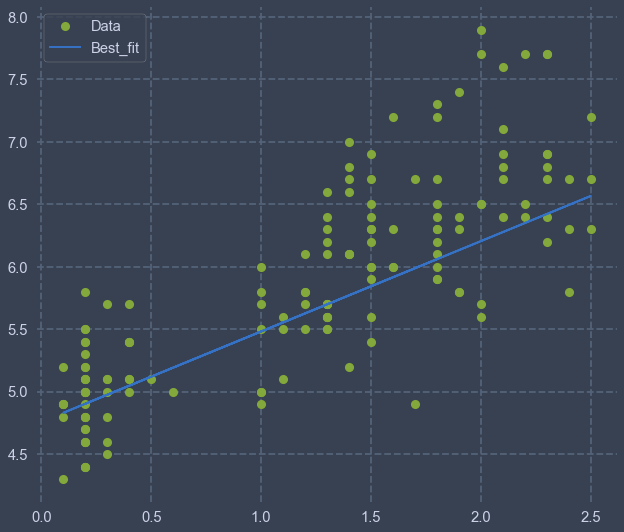

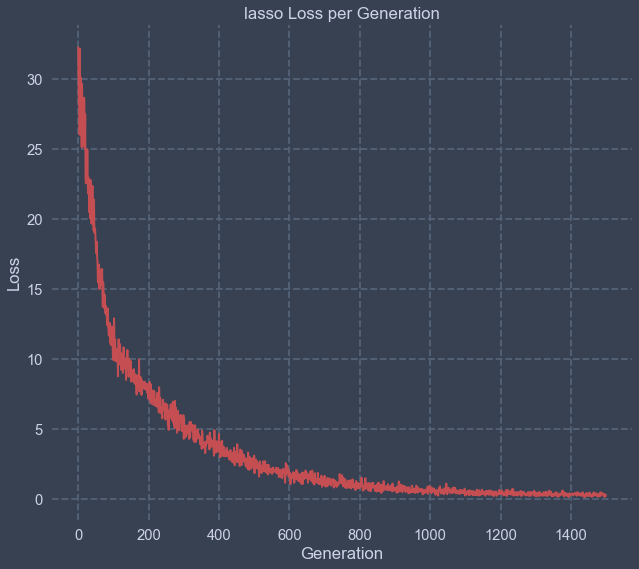

In [0]:
plt.plot(x_vals, y_vals, 'go', label = 'Data')
plt.plot(x_vals, best_fit, 'b-', label = 'Best_fit')
plt.legend(loc ='best')
plt.show()

#plot loss over time
plt.plot(loss_vec, 'r-')
plt.title(regression_type + ' Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()